# WeatherPY

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generating City List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
number_cities = len(cities)
number_cities

600

# API Calls

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

# Set up lists to hold response info
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_list = []

In [5]:
# start counter for iterating the city list
count = 0

# starting text
print("Beginning Data Retrieval")     
print("-----------------------------")

# for loop to pull data from city list
for city in cities:
    
    # increase counter
    count = count + 1
    
    #pull data
    response = requests.get(query_url + city).json()
    
    # print log of each city as it's being processed
    print(f"Processing Record #{count} of {number_cities} cities | {city}")
    
    # use try to stash data in lists, and except in case the city cannot be found
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(city)
    except:
        print("City not found. Skipping...")

# ending text
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")    

Beginning Data Retrieval
-----------------------------
Processing Record #1 of 600 cities | moerai
Processing Record #2 of 600 cities | belushya guba
City not found. Skipping...
Processing Record #3 of 600 cities | bathsheba
Processing Record #4 of 600 cities | cape town
Processing Record #5 of 600 cities | matagami
Processing Record #6 of 600 cities | airai
Processing Record #7 of 600 cities | atar
Processing Record #8 of 600 cities | hithadhoo
Processing Record #9 of 600 cities | umzimvubu
City not found. Skipping...
Processing Record #10 of 600 cities | touros
Processing Record #11 of 600 cities | hermanus
Processing Record #12 of 600 cities | westport
Processing Record #13 of 600 cities | ushuaia
Processing Record #14 of 600 cities | mahebourg
Processing Record #15 of 600 cities | bredasdorp
Processing Record #16 of 600 cities | methoni
Processing Record #17 of 600 cities | saldanha
Processing Record #18 of 600 cities | port alfred
Processing Record #19 of 600 cities | te anau
Proc

Processing Record #165 of 600 cities | praya
Processing Record #166 of 600 cities | plainview
Processing Record #167 of 600 cities | vostok
Processing Record #168 of 600 cities | havelock
Processing Record #169 of 600 cities | sainte-rose
Processing Record #170 of 600 cities | kutum
Processing Record #171 of 600 cities | talnakh
Processing Record #172 of 600 cities | carlagan
Processing Record #173 of 600 cities | turukhansk
Processing Record #174 of 600 cities | honiara
Processing Record #175 of 600 cities | broken hill
Processing Record #176 of 600 cities | sembakung
Processing Record #177 of 600 cities | ostrovnoy
Processing Record #178 of 600 cities | pisco
Processing Record #179 of 600 cities | ruteng
Processing Record #180 of 600 cities | porto walter
Processing Record #181 of 600 cities | thinadhoo
Processing Record #182 of 600 cities | luderitz
Processing Record #183 of 600 cities | provideniya
Processing Record #184 of 600 cities | kachug
Processing Record #185 of 600 cities |

Processing Record #327 of 600 cities | auki
Processing Record #328 of 600 cities | wahiawa
Processing Record #329 of 600 cities | rocha
Processing Record #330 of 600 cities | karratha
Processing Record #331 of 600 cities | tura
Processing Record #332 of 600 cities | ierapetra
Processing Record #333 of 600 cities | pandavapura
Processing Record #334 of 600 cities | port-gentil
Processing Record #335 of 600 cities | verkhnevilyuysk
Processing Record #336 of 600 cities | caxito
Processing Record #337 of 600 cities | micheweni
Processing Record #338 of 600 cities | chazuta
Processing Record #339 of 600 cities | darhan
Processing Record #340 of 600 cities | luebo
Processing Record #341 of 600 cities | cabo san lucas
Processing Record #342 of 600 cities | novyy urengoy
Processing Record #343 of 600 cities | ahipara
Processing Record #344 of 600 cities | panguna
Processing Record #345 of 600 cities | plattsburgh
Processing Record #346 of 600 cities | jumla
Processing Record #347 of 600 cities

Processing Record #489 of 600 cities | khash
Processing Record #490 of 600 cities | basco
Processing Record #491 of 600 cities | marzuq
Processing Record #492 of 600 cities | carutapera
Processing Record #493 of 600 cities | monteagudo
Processing Record #494 of 600 cities | sao bernardo
Processing Record #495 of 600 cities | borogontsy
Processing Record #496 of 600 cities | faya
Processing Record #497 of 600 cities | kochkurovo
Processing Record #498 of 600 cities | port blair
Processing Record #499 of 600 cities | amapa
Processing Record #500 of 600 cities | uvalde
Processing Record #501 of 600 cities | mackenzie
Processing Record #502 of 600 cities | bathurst
Processing Record #503 of 600 cities | lompoc
Processing Record #504 of 600 cities | winslow
Processing Record #505 of 600 cities | grand river south east
City not found. Skipping...
Processing Record #506 of 600 cities | rungata
City not found. Skipping...
Processing Record #507 of 600 cities | tselinnoye
Processing Record #508

# Creating the DataFrame

In [6]:
# create a dataframe from the collected data
weather_data = {
    "City": city_list,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_df = pd.DataFrame(weather_data)

# export the dataframe to a csv
weather_df.to_csv("weather_data.csv", index=False)

# preview the dataframe
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,moerai,-22.43,-151.33,69.62,80,22,17.98,PF,1598816030
1,bathsheba,13.22,-59.52,87.80,70,40,12.75,BB,1598815859
2,cape town,-33.93,18.42,48.00,75,0,2.24,ZA,1598816030
3,matagami,49.75,-77.63,60.80,51,75,10.22,CA,1598816030
4,airai,-8.93,125.41,56.39,100,3,4.00,TL,1598816031
...,...,...,...,...,...,...,...,...,...
548,jacareacanga,-6.22,-57.75,79.14,66,99,3.06,BR,1598816180
549,bonga,7.28,36.23,59.92,89,100,1.03,ET,1598816181
550,inirida,3.87,-67.92,74.25,94,100,2.10,CO,1598816181
551,maraa,-1.83,-65.37,87.66,58,97,3.13,BR,1598816181


In [9]:
# check the data for cities with humidity > 100%. Check maximum value first
# if the max value is 100 or less, data is clean to be used. Otherwise drop humidity outliers
weather_df["Humidity"].max()

100

# Plotting the Data
The next four scatter plots will represent the relationship of latitude to max temperature, humidity, cloudiness, and wind speed from a random sample of more than 500 cities using data collected from the OpenWeatherMap API.
## Latitude vs Temperature

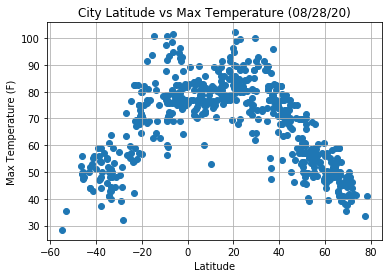

In [10]:
# Create a Scatter Plot for latitude vs temperature
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (08/28/20)')
plt.grid()
plt.savefig("Images/LatTemp.png")
plt.show()

Latitude and temperature appear to have a very strong correlation across both hemispheres.
## Latitude vs Humidity

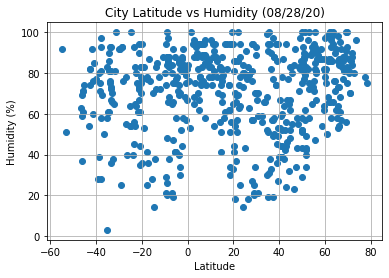

In [11]:
# Create a Scatter Plot for latitude vs humidity
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (08/28/20)')
plt.grid()
plt.savefig("Images/LatHumid.png")
plt.show()

There isn't a clear correlation between latitude and humidity, but the data is somewhat dense at both the equator and 60 degrees north with clusters of high humidities.
## Latitude vs Cloudiness

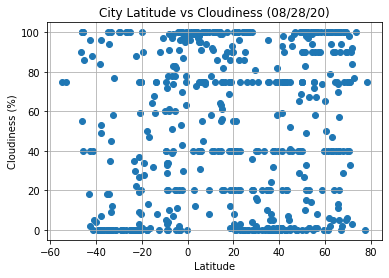

In [12]:
# Create a Scatter Plot for latitude vs cloudiness
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (08/28/20)')
plt.grid()
plt.savefig("Images/LatCloud.png")
plt.show()

There is a somewhat even spread of cloudiness across latitudes but signifcant clustering at 90% and 100% cloudiness, as well as at 0%. 
## Latitude vs Wind Speed

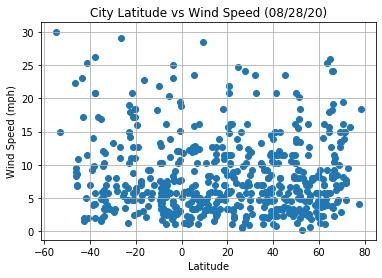

In [13]:
# Create a Scatter Plot for latitude vs wind speed
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (08/28/20)')
plt.grid()
plt.savefig("Images/LatWind.png")
plt.show()

Wind speed doesn't strongly correlate with latitude but the majority of cities sampled had low recorded wind speeds, most below 10 miles per hour.
# Linear Regression
The following four pairs of scatter plots will re-look at the previous four relationships, separating the data between hemispheres and also run linear regression on those relationships.

In [14]:
# separate out northern hemisphere and southern hemisphere data
north_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
south_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

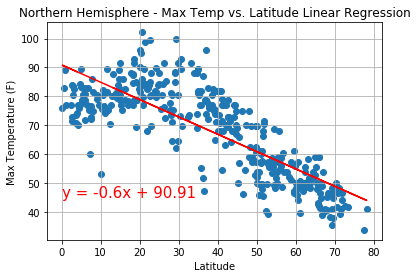

The r-value is: 0.6488602372499539


In [30]:
# Create a Scatter Plot for latitude vs temperature
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,45),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/NorthLatTemp.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

While some data begin to pull away from the line of regression, there is a strong negative correlation between max temperature and northern latitudes.
##  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

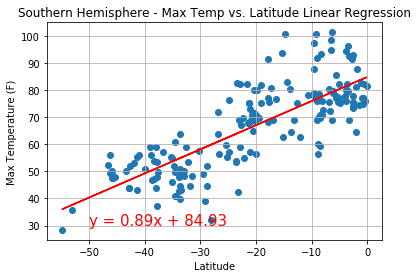

The r-value is: 0.6360304686484832


In [16]:
# Create a Scatter Plot for latitude vs temperature
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/SouthLatTemp.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

The data from the southern hemisphere isn't nearly as plentiful for determining the relationship viewed in the north, but it still indicates a positive correlation.
## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

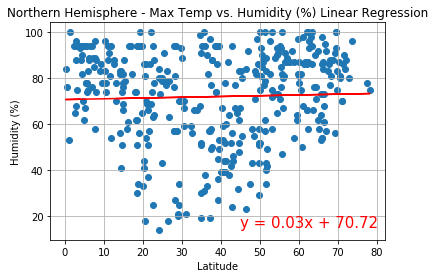

The r-value is: 0.0011581395931175734


In [23]:
# Create a Scatter Plot for latitude vs humidity
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Max Temp vs. Humidity (%) Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/NorthLatHumid.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

There appears to be no correlation between humidity and max temp in the northern hemisphere, but humidity is mostly high in the northern hemisphere, majoryly between 75% and 95%.
## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

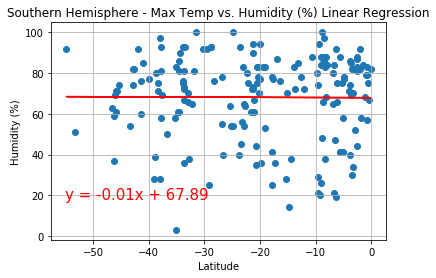

The r-value is: 4.138354925452091e-05


In [25]:
# Create a Scatter Plot for latitude vs humidity
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Max Temp vs. Humidity (%) Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/SouthLatHumid.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

The southern hemisphere has a looser spread of humidity data, and still no correlation.
## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

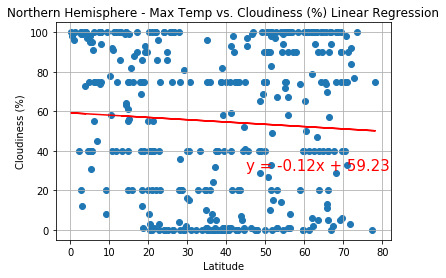

The r-value is: 0.003946809099761461


In [26]:
# Create a Scatter Plot for latitude vs humidity
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Max Temp vs. Cloudiness (%) Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/NorthLatCloud.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

 The data is too evenly spread to indicate correlation even with a gentle negative slope.
 ## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

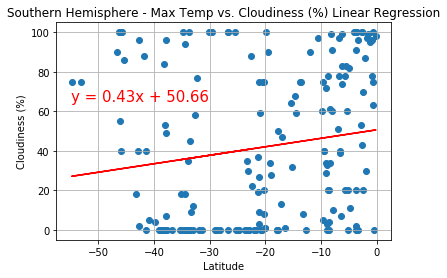

The r-value is: 0.024736662375489195


In [27]:
# Create a Scatter Plot for latitude vs humidity
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Max Temp vs. Cloudiness (%) Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/SouthLatCloud.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

The slope of the line could suggest very weak positive correlation, but the data is so far spread out as a whole that it isn't very representative.
##  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

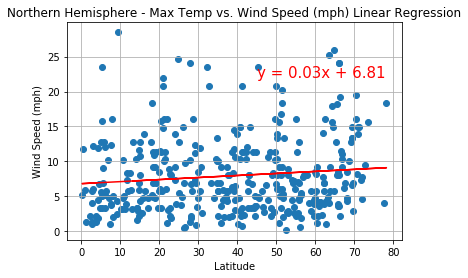

The r-value is: 0.012694049641306698


In [28]:
# Create a Scatter Plot for latitude vs humidity
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Max Temp vs. Wind Speed (mph) Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/NorthLatWind.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

Weak positive correlation between latitude and wind speed. A similar observation as before with densely pack data at low wind speeds.
## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

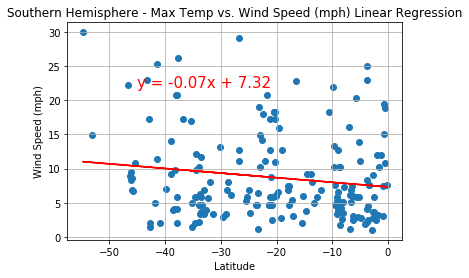

The r-value is: 0.023450246048266746


In [29]:
# Create a Scatter Plot for latitude vs humidity
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Max Temp vs. Wind Speed (mph) Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,22),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/SouthLatWind.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

Weak negative correlation between latitude and wind speed in the southern hemisphere. More sample data could improve the line to further that potential relationship if it would more closely include some slightly higher wind speeds at lower latitudes.